# Homework 2 - 95-791 Data Mining (Fall 2021) 
## Name: Xi Yan
#### Due: Friday, November 12th, before 1PM (EST)


### Changing the author field and file name.

 (a) Change the `name:` field on the Jupyter document from Your Name Here to your own name.

 (b) Rename this file to "Homework2_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.


### Installing and loading packages

Before you begin this Homework make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score 
import time

%matplotlib inline
plt.style.use('seaborn-white')

For this problem we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations) - target variable.
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

---

### Question 1. Data Processing [3 pts]
Let's start by loading and pre-processing our dataset.

**1)a) Load the `bikes` dataset into a dataframe called `bikes`. Check that there are no missing values in your dataset. If they are, take care of them appropriately. Print the first five rows.** [0 pts]

In [57]:
# your code here
bikes = pd.read_csv('./daily_citi_bike_trip_counts_and_weather.csv')
bikes.isnull().sum(axis=0)

trips                  0
precipitation          0
snow_depth             0
snowfall               0
max_temperature        0
min_temperature        0
average_wind_speed     3
year                   0
season                 0
month                  0
holiday                0
stations_in_service    0
weekday                0
weekday_non_holiday    0
dtype: int64

In [58]:
bikes = bikes.dropna(axis=1)
bikes.head(5)

trips  precipitation  snow_depth  snowfall  max_temperature  \
0  20138       0.649606         0.0       0.0            75.92   
1  35792       0.000000         0.0       0.0            82.94   
2  29540       0.059055         0.0       0.0            78.08   
3  35253       0.000000         0.0       0.0            80.06   
4  36776       0.000000         0.0       0.0            78.08   

   min_temperature  year  season  month  holiday  stations_in_service  \
0            66.02  2013  summer      8    False                  329   
1            66.92  2013  summer      8    False                  329   
2            68.00  2013  summer      8    False                  329   
3            66.02  2013  summer      8    False                  329   
4            62.06  2013  summer      8    False                  329   

   weekday  weekday_non_holiday  
0     True                 True  
1     True                 True  
2    False                False  
3    False                False  
4     True                 True

**1)b) We need to encode our qualitative predictors before we proceed into any modeling. Predictors `holiday`, `weekday`,`weekday_non_holiday` are type boolean, therefore you must cast them to be numerical. For predictor `season` you will either have to create [dummy variables](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) and append them to your dataframe or map each season to a different number (spring:1,summer:2,fall:3,winter:4). Print the first five rows of your dataset.** [2 pts]

In [59]:
# your code here
# True = 1, False = 0
bikes['holiday'] = bikes['holiday'].astype(int)
bikes['weekday'] = bikes['weekday'].astype(int)
bikes['weekday_non_holiday'] = bikes['weekday_non_holiday'].astype(int)
#bikes['season'] = pd.factorize(bikes['season'])[0] +1
season = {'spring':1,'summer':2,'fall':3,'winter':4}
bikes['season'] = bikes['season'].map(season)
bikes.head(5)

trips  precipitation  snow_depth  snowfall  max_temperature  \
0  20138       0.649606         0.0       0.0            75.92   
1  35792       0.000000         0.0       0.0            82.94   
2  29540       0.059055         0.0       0.0            78.08   
3  35253       0.000000         0.0       0.0            80.06   
4  36776       0.000000         0.0       0.0            78.08   

   min_temperature  year  season  month  holiday  stations_in_service  \
0            66.02  2013       2      8        0                  329   
1            66.92  2013       2      8        0                  329   
2            68.00  2013       2      8        0                  329   
3            66.02  2013       2      8        0                  329   
4            62.06  2013       2      8        0                  329   

   weekday  weekday_non_holiday  
0        1                    1  
1        1                    1  
2        0                    0  
3        0                    0  
4        1                    1

**1)d) Split your dataframe into `X` and `y` dataframe, and then split into `X_train`, `X_test`, `y_train` and `y_test`. Use a 80-20 ratio for the split and a random_state=(your birthday month). Print out your y_test.** [1pts]

In [60]:
# your code here
X = bikes.drop(['trips'], axis=1)
y = bikes['trips']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(y_test)

112    28752
759    32913
63     40456
395    18053
781    47180
       ...  
354    35670
663    35786
385    33804
383    35367
463    25355
Name: trips, Length: 171, dtype: int64


---

### Question 2 - Linear vs Polynomial Models [10  pts]


**2)a) Use Scikit-learn to train a Linear Regression on your dataset. Print out the train MSE and train $R^2$, the test MSE and test $R^2$. How good of a fit is your Linear Model?**[5 pts]

In [61]:
#Your code here
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print('Train MSE is', mean_squared_error(y_train, y_train_pred))
print('Test MSE is', mean_squared_error(y_test, y_test_pred))
print('Train R^2 is', lm.score(X_train, y_train))
print('Test R^2 is', lm.score(X_test, y_test))

Train MSE is 18337756.599788707
Test MSE is 16551981.067180162
Train R^2 is 0.8719841783394036
Test R^2 is 0.8865354227387804


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


--> Your answer here
The Train MSE is 18861767, The Test MSE is 14542926, The Train R^2 is 86.7%, The Test R^2 is 90.5%. The linear regression fit the dataset pretty well since the R^2 is relatively high, about 90 percent of the data is explained by the model. The test MSE is smaller than train MSE so it shows the model is also not over fitted as well.

**2)b) Use Scikit-learn to train a Polynomial Regression on your dataset. Iterate through degrees 1 to 6, and for each degree print out the degree, its train MSE and its test MSE. Are any of the MSEs better than a Linear Regression? What can you comment on the results between the Train and Test MSEs?**[5 pts]

In [62]:
#Your code here
for i in [1, 2, 3, 4, 5, 6]:
    poly_model = PolynomialFeatures(degree=i)

    X_poly_train = poly_model.fit_transform(X_train)
    X_poly_test = poly_model.fit_transform(X_test)

    lm_poly = LinearRegression(normalize=True)
    lm_poly.fit(X_poly_train, y_train)
    y_train_pred_poly = lm_poly.predict(X_poly_train)
    y_test_pred_poly = lm_poly.predict(X_poly_test)

    print('MSE for polynomial model degree', i, "train is", mean_squared_error(y_train, y_train_pred_poly))
    print('MSE for polynomial model degree', i, "test is", mean_squared_error(y_test, y_test_pred_poly))
    print('R^2 for polynomial model degree', i, "train is", lm_poly.score(X_poly_train, y_train))
    print('R^2 for polynomial model degree', i, "test is", lm_poly.score(X_poly_test, y_test))
    print('\n')

MSE for polynomial model degree 1 train is 18337756.599788897
MSE for polynomial model degree 1 test is 16551981.067180276
R^2 for polynomial model degree 1 train is 0.8719841783394022
R^2 for polynomial model degree 1 test is 0.8865354227387796


MSE for polynomial model degree 2 train is 7861950.936910332
MSE for polynomial model degree 2 test is 10061027.84221639
R^2 for polynomial model degree 2 train is 0.945115745016734
R^2 for polynomial model degree 2 test is 0.9310312000541139


MSE for polynomial model degree 3 train is 28890716.62848752
MSE for polynomial model degree 3 test is 4.4439603834404377e+30
R^2 for polynomial model degree 3 train is 0.7983139972747866
R^2 for polynomial model degree 3 test is -3.0463548999127685e+22




/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

MSE for polynomial model degree 4 train is 675752.2901752937
MSE for polynomial model degree 4 test is 1.0362056475683203e+23
R^2 for polynomial model degree 4 train is 0.995282575368744
R^2 for polynomial model degree 4 test is -710323648147197.8




/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


MSE for polynomial model degree 5 train is 2149.432231613781
MSE for polynomial model degree 5 test is 1.786597524053006e+20
R^2 for polynomial model degree 5 train is 0.9999849948202914
R^2 for polynomial model degree 5 test is -1224720666243.401




/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


MSE for polynomial model degree 6 train is 2149.428060245465
MSE for polynomial model degree 6 test is 3.7492839282416876e+18
R^2 for polynomial model degree 6 train is 0.9999849948494116
R^2 for polynomial model degree 6 test is -25701510544.69216




--> Your answer here
The degree 2 Polynomial model have a both better test and train R^2 and smaller MSE than the linear model, which demonstrate that degree 2 polynomial is a better fitted model than the linear model. However, the MSE after degree 2 for test are smaller, and degree 6 has the lowest MSE. This means that the model is probably in an overfitting situation where it has smaller MSE but negative R^2, which means the majority of the data is not explained by the polynomial trend line.

---

### Question 3 - Variable Selection [15 pts]

Sequential Feature Selection (SFS) in the equivalent of Forward or Backwards stepwise selection in scikitlearn. SFS will choose the best new feature in each iteration and add it to the model. To measure and select the best feature to add to the combination in each SFS uses the cross-validation score. You can find the full description of SFS [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html?highlight=sequential%20feature#sklearn.feature_selection.SequentialFeatureSelector).

In [63]:
from sklearn.feature_selection import SequentialFeatureSelector

Let's try SFS as a Forward stepwise selection. Look a the description below for SFS and apply sfs to the boston dataset. For this question, use a linear model, pick the number of features to select, do forward sfs, use the MSE, and a cv with k=10.

**SequentialFeatureSelector**

- estimator - this will be a certain model. For example LinearRegression()
- n_features_to_select - Default is `None`, which means half of the features are selected.
- directions - `backward` or `forward`" selection.
- scoring - take a loook at the [metrics and scoring](https://scikit-learn.org/0.24/modules/model_evaluation.html#scoring-parameter) reference. A common metric for regression would be `neg_mean_squared_error` (negative MSE)
- cv - cross-validation. Default=`None` will yield a 5-fold cross validation. Otherwise change this number.

*Note: You do not need to split up your dataset, you are choosing the best features and SFS comes with CV*

**3)a)Complete and run the code below. Select four features with the SFS build a LinearRegression. Use a `k=10` for your cross validation. What is the $R^2$ of this model?**[4pts]

In [64]:
model= LinearRegression()
sfs = SequentialFeatureSelector(model,
                                n_features_to_select = 4,
                                direction="forward",
                                scoring='neg_mean_squared_error',
                                cv= 10)
sfs = sfs.fit(X,y)
feature_names= X_train.columns.values#column names for X
print("Features selected by forward sequential selection: "+str(feature_names[sfs.get_support()]))

Features selected by forward sequential selection: ['precipitation' 'max_temperature' 'stations_in_service'
 'weekday_non_holiday']


In [65]:
#code for Linear Regression
X_train_selected = X_train[['precipitation', 'max_temperature', 'stations_in_service', 'weekday_non_holiday']]
X_test_selected = X_test[['precipitation', 'max_temperature', 'stations_in_service', 'weekday_non_holiday']]
lm2 = LinearRegression(normalize=True)
lm2.fit(X_train_selected, y_train)
print('Train R^2 is', lm2.score(X_train_selected, y_train))
print('Test R^2 is', lm2.score(X_test_selected, y_test))

Train R^2 is 0.8512933541233674
Test R^2 is 0.8624194002425953


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


**3)b) Use 3)a) and put it inside a loop, from 1 to your total number of features). Print the results (Number of features and features selected). What are the features selected when the model has 6 features?** [3pts]

In [66]:
#your code here
for i in range(1,len(bikes.columns)-1):
    model= LinearRegression()
    sfs = SequentialFeatureSelector(model,
                                n_features_to_select = i,
                                direction="forward",
                                scoring='neg_mean_squared_error',
                                cv= 10)
    sfs = sfs.fit(X,y)
    feature_names= X_train.columns.values#column names for X
    print(i, "features selected by forward sequential selection: "+str(feature_names[sfs.get_support()]))
    print('\n')

1 features selected by forward sequential selection: ['max_temperature']


2 features selected by forward sequential selection: ['max_temperature' 'stations_in_service']


3 features selected by forward sequential selection: ['max_temperature' 'stations_in_service' 'weekday_non_holiday']


4 features selected by forward sequential selection: ['precipitation' 'max_temperature' 'stations_in_service'
 'weekday_non_holiday']


5 features selected by forward sequential selection: ['precipitation' 'max_temperature' 'month' 'stations_in_service'
 'weekday_non_holiday']


6 features selected by forward sequential selection: ['precipitation' 'snow_depth' 'max_temperature' 'month'
 'stations_in_service' 'weekday_non_holiday']


7 features selected by forward sequential selection: ['precipitation' 'snow_depth' 'max_temperature' 'month'
 'stations_in_service' 'weekday' 'weekday_non_holiday']


8 features selected by forward sequential selection: ['precipitation' 'snow_depth' 'max_temperature' 'yea

--> Your answer here
6 features selected by forward sequential selection: ['precipitation' 'snow_depth' 'max_temperature' 'month'
 'stations_in_service' 'weekday_non_holiday']

**3)c) Use your loop from 3)b) and add a [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to the loop. For each iteration print the predictors selected and the average CV. Save all the CV errors in an array.** [4pts]

In [67]:
# your code here
# import statistics package to calculate mean
from statistics import mean
CV_array = []
for i in range(1,len(bikes.columns)-1):
    model= LinearRegression()
    sfs = SequentialFeatureSelector(model,
                                n_features_to_select = i,
                                direction="forward",
                                scoring='neg_mean_squared_error',
                                cv= 10)
    sfs = sfs.fit(X,y)
    feature_names= X_train.columns.values#column names for X
    print(i, "features selected by forward sequential selection: "+str(feature_names[sfs.get_support()]))
    CV_score = mean(cross_val_score(model,X[feature_names[sfs.get_support()]],y,cv=10, scoring='neg_mean_squared_error'))
    print('The average CV score for', i, 'feature(s) are', CV_score)
    CV_array.append(CV_score)
    print('\n')

1 features selected by forward sequential selection: ['max_temperature']
The average CV score for 1 feature(s) are -56506620.87336826


2 features selected by forward sequential selection: ['max_temperature' 'stations_in_service']
The average CV score for 2 feature(s) are -42494740.332482025


3 features selected by forward sequential selection: ['max_temperature' 'stations_in_service' 'weekday_non_holiday']
The average CV score for 3 feature(s) are -34318834.21694021


4 features selected by forward sequential selection: ['precipitation' 'max_temperature' 'stations_in_service'
 'weekday_non_holiday']
The average CV score for 4 feature(s) are -27572693.64113617


5 features selected by forward sequential selection: ['precipitation' 'max_temperature' 'month' 'stations_in_service'
 'weekday_non_holiday']
The average CV score for 5 feature(s) are -24617859.960130297


6 features selected by forward sequential selection: ['precipitation' 'snow_depth' 'max_temperature' 'month'
 'stations_in

**3)d) Use the CV errors you collected from 3)c) and plot a graph of number of predictors vs CV error. Calculate the lowest CV error and draw a vertical line on your plot to indicate this number. What is the number of predictors that corresponds to the lowest CV error?** [4pts]

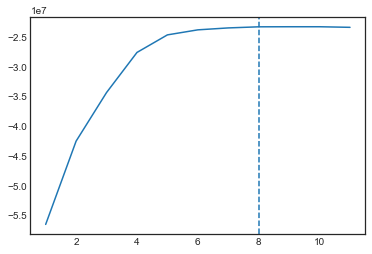

In [68]:
# your code here
cvs_min = CV_array.index(max(CV_array))
feature_num = range(1,len(bikes.columns)-1)
plt.plot(feature_num, CV_array)
plt.axvline(x=cvs_min, linestyle='--')
plt.show()

--> Your answer here
The graph is shown above, the number of predicutors that have the lowest CV error is 8.

---

### Question 4 - Regularized Regression [ 12 pts]

This question is very similar to what we did in Lab 2.

**4)a) Train a [Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) on your dataset. Different to our Lab 2, use the `cross_val_score` (instead of the test and train MSE), and plot two graphs: coefficients vs alphas, and CV_error vs alphas. In the second graph find the lowest CV_error and draw a vertical line on the graph to indicate the alpha that corresponds to this value. What is your best alpha?**[3 pts]

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. T

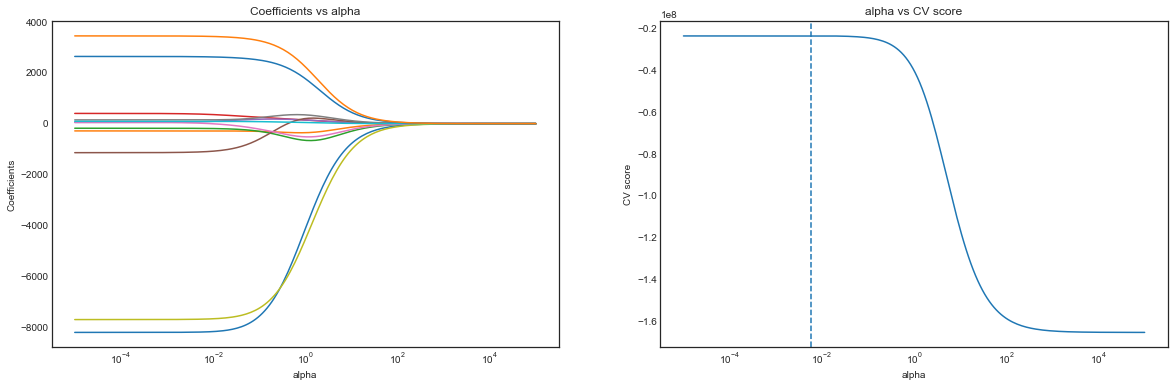

The best alpha is  0.005805225516094902


In [69]:
#your code here
model_ridge = Ridge(normalize=True)
coefficient = []
cvs_ridge_arr = []
alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_ridge.set_params(alpha = a)
    model_ridge.fit(X, y)
    coefficient.append(model_ridge.coef_)
    cvs_ridge = mean(cross_val_score(model_ridge, X, y, scoring='neg_mean_squared_error', cv=10))
    cvs_ridge_arr.append(cvs_ridge)

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefficient)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients vs alpha')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, cvs_ridge_arr)
ax.axvline(x=alphas[cvs_ridge_arr.index(max(cvs_ridge_arr))], linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV score')
plt.title('alpha vs CV score')
plt.axis('tight')

plt.show()
print('The best alpha is ', alphas[cvs_ridge_arr.index(max(cvs_ridge_arr))])

 --> your answer here
The best alpha is 0.005.

**4)b) Repeat your Ridge regression, but using RidgeCV, and print out the best alpha for this model. Is this alpha the same or close enough to the alpha calculated in 4)a)?**[3 pts]

In [70]:
#your code here
model_ridgeCV = RidgeCV(normalize=True, alphas=alphas, cv=10).fit(X, y)

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. T

In [71]:
print("RidgeCV - best alpha: " + str(model_ridgeCV.alpha_))

RidgeCV - best alpha: 1e-05


--> your answer here
The best alpha for this model is 1e-05, which is not close to the alpha calculated in 4a, which is 0.005.

**4)a) Train a [Lasso regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) on your dataset. Different to our Lab 2, use the `cross_val_score` (instead of the test and train MSE), and plot two graphs: coefficients vs alphas, and CV_error vs alphas. In the second graph find the lowest CV_error and draw a vertical line on the graph to indicate the alpha that corresponds to this value. What is your best alpha?**[2 pts]

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing

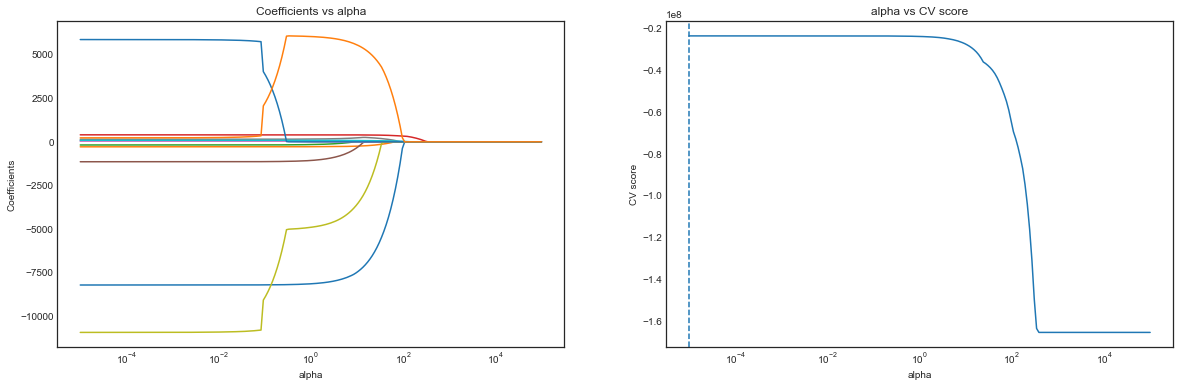

The best alpha is  1e-05


In [72]:
#your code here
model_lasso = Lasso(normalize=True)
coefficient_l = []
cvs_lasso_arr = []
alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_lasso.set_params(alpha = a)
    model_lasso.fit(X, y)
    coefficient_l.append(model_lasso.coef_)
    cvs_lasso = mean(cross_val_score(model_lasso, X, y, scoring='neg_mean_squared_error', cv=10))
    cvs_lasso_arr.append(cvs_lasso)

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefficient_l)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients vs alpha')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, cvs_lasso_arr)
ax.axvline(x=alphas[cvs_lasso_arr.index(max(cvs_lasso_arr))], linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV score')
plt.title('alpha vs CV score')
plt.axis('tight')

plt.show()
print('The best alpha is ', alphas[cvs_lasso_arr.index(max(cvs_lasso_arr))])

--> your answer here
The best alpha is 1e-05

**4)d) Repeat your Lasso regression, but using LassoCV, and print out the best alpha for this model. Is this alpha the same or close enough to the alpha calculated in 4)c)?**[2 pts]

In [73]:
#your code here
model_lassoCV = LassoCV(normalize=True, alphas=alphas, cv=10).fit(X, y)
print("LassoCV - best alpha: " + str(model_lassoCV.alpha_))

LassoCV - best alpha: 1e-05


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


--> your answer here
The best alpha for LassoCV is 1e-05, which is the same as the alpha calculated from 4c.

**4)e) Print out the best results from your Lasso, Ridge and Linear regression. Which model works best with your data?** [2 pts]

*Note: If you didn't save your results from all your models, go back and modify your code from the previous questions.*

In [74]:
#your code here
y_lasso_pred = model_lassoCV.predict(X)
y_ridge_pred = model_ridgeCV.predict(X)
print("Lasso - R-squared: "+str(model_lassoCV.score(X, y)))
print("Lasso - MSE: "+str(mean_squared_error(y, y_lasso_pred)))
print('\n')
print("Ridge - R-squared: "+str(model_ridgeCV.score(X, y)))
print("Ridge - MSE: "+str(mean_squared_error(y, y_ridge_pred)))
print('\n')
print("Linear - train R-squared: "+str(model_ridgeCV.score(X_train, y_train)))
print("Linear - test R-squared: "+str(model_ridgeCV.score(X_test, y_test)))
print("Linear - train MSE: "+str(mean_squared_error(y_train, y_train_pred)))
print("Linear - test MSE: "+str(mean_squared_error(y_test, y_test_pred)))

Lasso - R-squared: 0.875391769785727
Lasso - MSE: 17915493.23194815


Ridge - R-squared: 0.8753917692197761
Ridge - MSE: 17915493.31331748


Linear - train R-squared: 0.8715434939143958
Linear - test R-squared: 0.8904395796658289
Linear - train MSE: 18337756.599788707
Linear - test MSE: 16551981.067180162


--> your answer here
From the previous R square and MSE, we are able to see that all of the R square are very close, linear has a slightly higher R-squared, lasso and ridge have a very close R-squared, which Lasso is tiny bit higher. For MSE, all of them have similar MSE, but if we really want to figure out the best model, since Lasso has a tiny bit smaller MSE than Ridge, I would state that Lasso is the best model, although they are all very close.

---

### Question 5 - Classifications and Comparisons [ 10 pts]

For this question we will another data set from [Kaggle](https://www.kaggle.com/prathamtripathi/drug-classification), related to Drug classification. Go ahead, download and read this dataset.

**5)a) Begin by creating a training and testing datasest from our `df_drugs` dataset, with a 70-30 ratio, and random_state=1.** [1 pts]

In [75]:
#Your code here
df_drugs = pd.read_csv('drug200.csv')
df_drugs.isnull().sum(axis=0)
df_drugs = df_drugs.dropna(axis=1)
Sex = {'F':0, 'M':1}
Cholesterol = {'NORMAL':0, 'HIGH':1}
BP = {'HIGH':1,'NORMAL':2,'LOW':3}
df_drugs['Sex'] = df_drugs['Sex'].map(Sex)
df_drugs['Cholesterol'] = df_drugs['Cholesterol'].map(Cholesterol)
df_drugs['BP'] = df_drugs['BP'].map(BP)
print(df_drugs.head(5))
X_drug = df_drugs.drop(['Drug'], axis=1)
y_drug = df_drugs['Drug']
X_drug_train, X_drug_test, y_drug_train, y_drug_test = train_test_split(X_drug, y_drug, test_size=0.3, random_state=1)

   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   1            1   25.355  DrugY
1   47    1   3            1   13.093  drugC
2   47    1   3            1   10.114  drugC
3   28    0   2            1    7.798  drugX
4   61    0   3            1   18.043  DrugY


**5)b) Train a KNN model for question 5)a), and print out its confusion matrix. How well did your model perform? Did it classify all classes the same? What was the accuracy? Include comments to explain your code.** [2 pts]

[[26  0  1  0  0]
 [ 1  3  0  0  0]
 [ 0  0  2  0  4]
 [ 0  2  1  0  1]
 [ 1  2  3  3 10]]


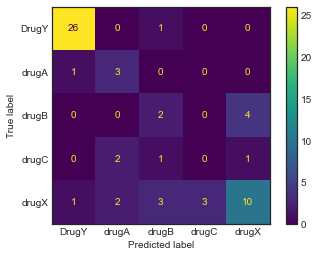

              precision    recall  f1-score   support

       DrugY       0.93      0.96      0.95        27
       drugA       0.43      0.75      0.55         4
       drugB       0.29      0.33      0.31         6
       drugC       0.00      0.00      0.00         4
       drugX       0.67      0.53      0.59        19

    accuracy                           0.68        60
   macro avg       0.46      0.51      0.48        60
weighted avg       0.69      0.68      0.68        60



In [76]:
# your code here
# Fit KNN
knn = KNeighborsClassifier()
knn.fit(X_drug_train,y_drug_train)
# predict y test using KNN model
y_drug_pred = knn.predict(X_drug_test)
# Generate confusion matrix
c_matrix = confusion_matrix(y_drug_test, y_drug_pred)
print(c_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=knn.classes_)
disp.plot()
plt.show()
print(classification_report(y_drug_test, y_drug_pred))

--> Your answer here
As shown above, the KNN model predicts Drug Y pretty well, Drug X secondarily well, and it doesn't predict Drug A, Drug B, Drug C that well. The accuracy is 68%, which is not exceptionally good.

**5)c) Use cross validation to determine what is the optimal number of neighbors for your KNN model. Plot a graph of # neighbors vs accuracy of your model. Include comments to explain your code.** [2 pts]

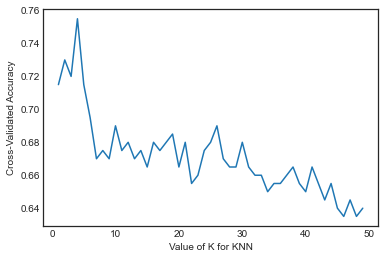

The optimal number of neighbors for my KNN model is: 3


In [77]:
#your code here
# Create a list for accuracy for each knn neighbor
accuracy = []
# range(1, 50) tests KNN neighbors from 1 to 50 to see which is the highest
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_drug_train,y_drug_train)
    # Cross Validation K = 10, scoring based on accuracy
    scores = cross_val_score(knn, X_drug, y_drug, cv=10, scoring='accuracy')
    accuracy.append(mean(scores))

plt.plot(range(1,50), accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print('The optimal number of neighbors for my KNN model is:', accuracy.index(max(accuracy)))

**5)d) Now that you have the optimal number of neighbors, re-train your model with this information. What is the new accuracy of your model? Print out the confusion matrix of this model and another metric that will help you justify how good this model is. Include comments to explain your code.** [2 pts]

[[26  0  1  0  0]
 [ 1  3  0  0  0]
 [ 0  0  1  0  5]
 [ 0  2  0  0  2]
 [ 1  4  4  1  9]]


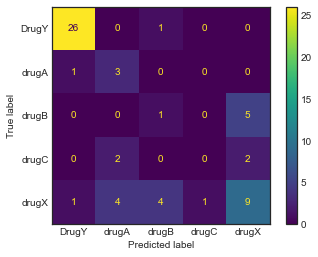

              precision    recall  f1-score   support

       DrugY       0.93      0.96      0.95        27
       drugA       0.33      0.75      0.46         4
       drugB       0.17      0.17      0.17         6
       drugC       0.00      0.00      0.00         4
       drugX       0.56      0.47      0.51        19

    accuracy                           0.65        60
   macro avg       0.40      0.47      0.42        60
weighted avg       0.63      0.65      0.64        60



In [78]:
#your code here
# Fit KNN using n neighbors of 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_drug_train,y_drug_train)
# predict y test using KNN model
y_drug_pred = knn.predict(X_drug_test)
# Generate confusion matrix
c_matrix = confusion_matrix(y_drug_test, y_drug_pred)
print(c_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=knn.classes_)
disp.plot()
plt.show()
print(classification_report(y_drug_test, y_drug_pred))

--> Your answer here
The new accuracy of the model is 65%, which is slightly better than the previous one, but it is still not really good. It predicts DrugY as well as the previous one, and it predict drugX slightly worse than previous one, for Drug ABC, they are all very similar, which the model cannot predict them precisely.

**5)e) Train a [Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html) for your dataset, and print out its confusion matrix. How well did your model perform? Did it classify all classes the same? What was the accuracy? Include comments to explain your code.** [2 pts]

[[20  3  0  4  0]
 [ 0  4  0  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 18]]


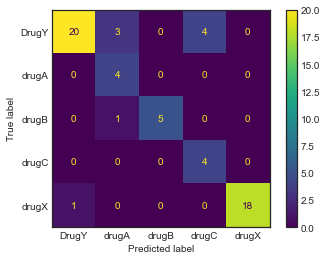

              precision    recall  f1-score   support

       DrugY       0.95      0.74      0.83        27
       drugA       0.50      1.00      0.67         4
       drugB       1.00      0.83      0.91         6
       drugC       0.50      1.00      0.67         4
       drugX       1.00      0.95      0.97        19

    accuracy                           0.85        60
   macro avg       0.79      0.90      0.81        60
weighted avg       0.91      0.85      0.86        60



In [79]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
#your code here
model.fit(X_drug_train, y_drug_train)
y_drug_pred2 = model.predict(X_drug_test)
c_matrix2 = confusion_matrix(y_drug_test, y_drug_pred2)
print(c_matrix2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=c_matrix2, display_labels=model.classes_)
disp2.plot()
plt.show()
print(classification_report(y_drug_test, y_drug_pred2))


--> Your answer here
The model perform a pretty well classification. The model perform a better classification on drugB and durgX than KNN, and a slightly worse classification on DrugY than KNN. Comparing to itslef, although Drug A and Druc C classification performed worse than Drug Y, B, X, the accuracy of the model is 85%, which is higher than the KNN model.

**5)f) What classification model performed better? Why do you think this happened? Was there a particular class that was more difficult to classify? Justify your answers.** [ 1 pts]

--> Your answer here
In this case, the Naive Bayes does perform better. The reason I think that cause this is that there are too many categorical data, 5 of them, with many of outliers that potentially mess up with the KNN model, as a result, we might need more data for the KNN method to have more accuracy. For Naive Bayes, since it is just caluclating probabilities, it is a more direct approach, and works better with this dataset.

---

### REFERENCES

**List any references you used to complete your homework. Even if they are one of the books assigned for this class. If this section is incomplete you will be deducted 50% of your final grade from this homework.**

**Note: if there are no comments to explain your code you will receive 0 in this homework**

1. How to deal with Cross-Validation based on KNN algorithm, Compute AUC based on Naive Bayes algorithm https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4
2. numpy.logspace https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
3. Plotting Validation Curves https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
4. Validation Curve https://www.geeksforgeeks.org/validation-curve/
5. Python Average: How to Find AVERAGE of a List in Python https://www.guru99.com/find-average-list-python.html
6. How to get column names in Pandas dataframe https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
7. Convert categorical data in pandas dataframe https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe/46186626
8. Classification (machine learning): When should I use a K-NN classifier over a Naive Bayes classifier? https://www.quora.com/Classification-machine-learning-When-should-I-use-a-K-NN-classifier-over-a-Naive-Bayes-classifier

### Total Score:  --/50

### END OF HOMEWORK 2